This dataset contains an airline passenger satisfaction survey.What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?
## Data Dictionary
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sma
from sklearn.metrics import r2_score,recall_score,roc_auc_score,roc_curve,accuracy_score,confusion_matrix,f1_score,classification_report,cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [2]:
data=pd.read_csv(r"C:\Users\vivek\Desktop\GGN AUG2022\my_projects_dse\airline\archive (2)\train.csv")

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Checking basic details of dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [6]:
data.shape

(103904, 25)

<AxesSubplot:>

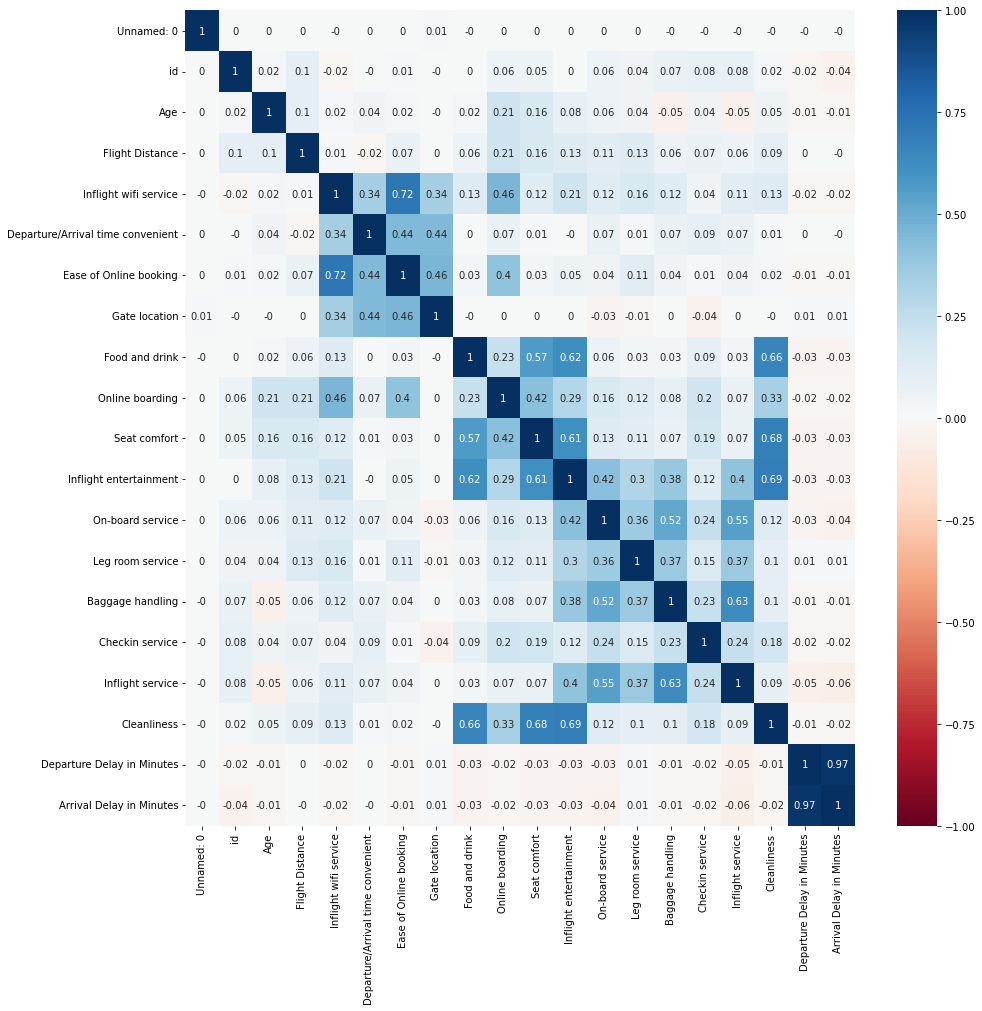

In [7]:
plt.figure(figsize=[15,15])
sns.heatmap(round(data.corr(),2),vmax=1,vmin=-1,annot=True,cmap='RdBu')

In [8]:
for i in range(8,22):
    data.iloc[:,i]=data.iloc[:,i].astype(object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  object 
 9   Departure/Arrival time convenient  103904 non-null  object 
 10  Ease of Online booking             103904 non-null  object 
 11  Gate location                      1039

In [10]:
#### removing irrelevant columns
data.drop(['Unnamed: 0','id'],axis=1,inplace=True)

### Univariate Analysis--Numercial columns

In [11]:
num_col=data.select_dtypes(include=np.number).columns
cat_col=data.select_dtypes(include=np.object).columns

In [12]:
num_col

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

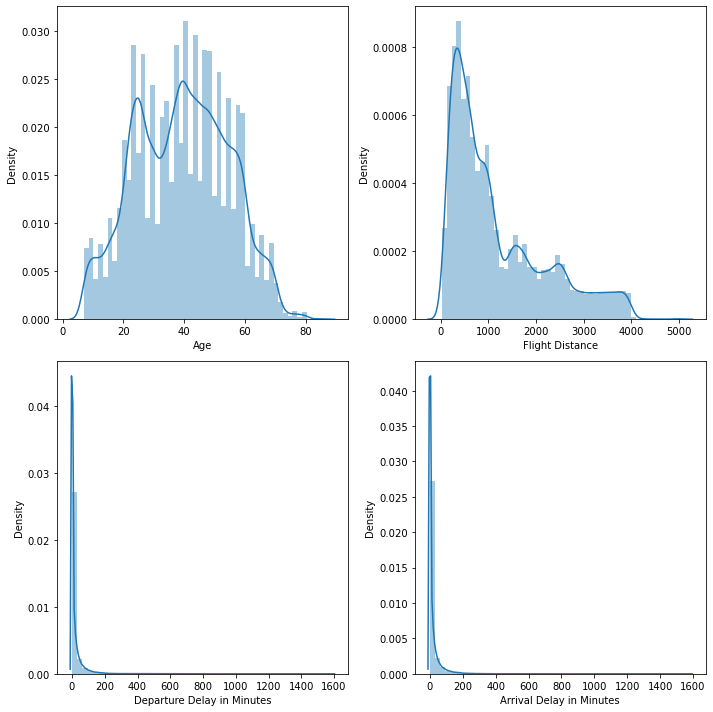

In [13]:
t=1
plt.figure(figsize=[10,10])
for i in num_col:
    plt.subplot(2,2,t)
    sns.distplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()
    

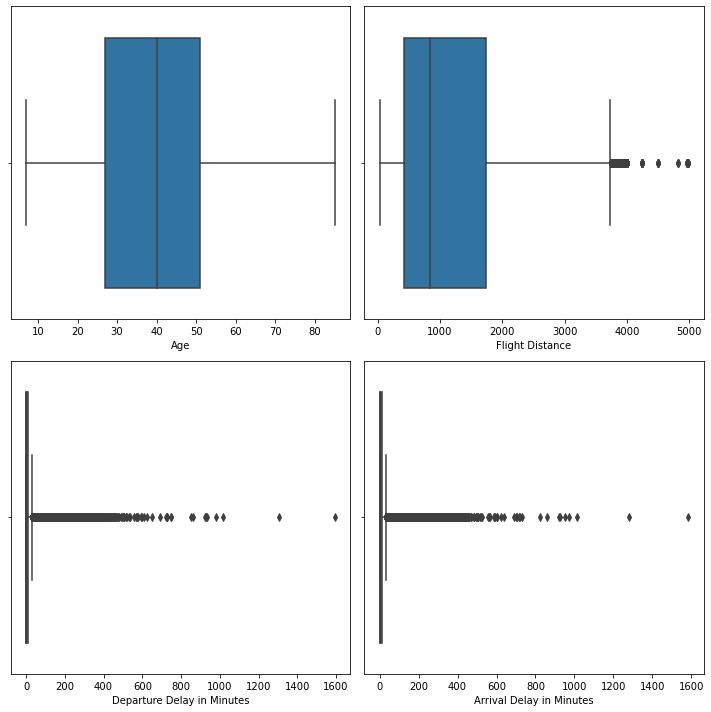

In [14]:
t=1
plt.figure(figsize=[10,10])
for i in num_col:
    plt.subplot(2,2,t)
    sns.boxplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()
    

### Univariate Analysis -- categorical columns

In [15]:
cat_col.shape

(19,)

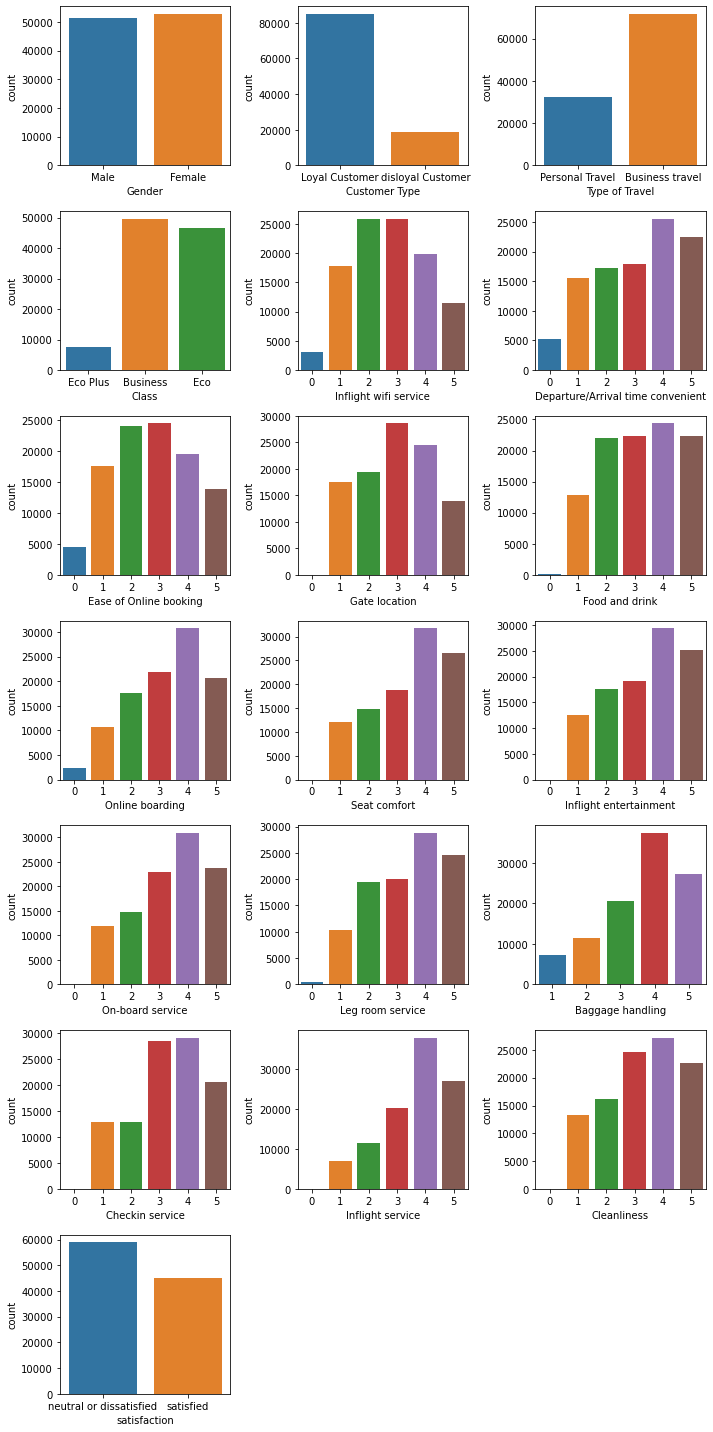

In [16]:
t=1
plt.figure(figsize=[10,20])
for i in cat_col:
    plt.subplot(7,3,t)
    sns.countplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

### Inference of Univariate analysis

* age of the passengers uniformly distributed between 27-55 years (usually belong to working class)
* outliers present in flight distance which is justified . most of flight distance revolves between range of 500 to 1800km
* many outliers present in departure delay in minutes as well as arrival delay in minutes
* percentage of loyal customers are high as compare to disloyal customer
* most of travels are associated with business travel
* people usually prefer business class or eco
* inflight wifi service usually ranges 2 to 3 point
* departure /arrival time convenient between 4 to 5 
* ease of online booking gets 3 point out of 5 mostly.
* gate location gets 3 point which means people have to walk a long to take a flight.
* food drinkning service in the flights are almost equal in term of points
* online boarding get 4 points out of 5
* seat comfort of flights get 4 out of 5 
* inflight entertainment get 4 out of 5 
* on board service gets 4 out of 5
* leg room service gets 4 out of 5 points
* baggage handling get 4 out of 5 points
* checkin service variate between 3 to 4 out of 5 points
* inflight service is 4 out of 5
* cleanliness gets 4 out of 5
* 60:40 ratio follows between not satisfied and satisfied respectively


### Bivariate Analysis- numerical columns

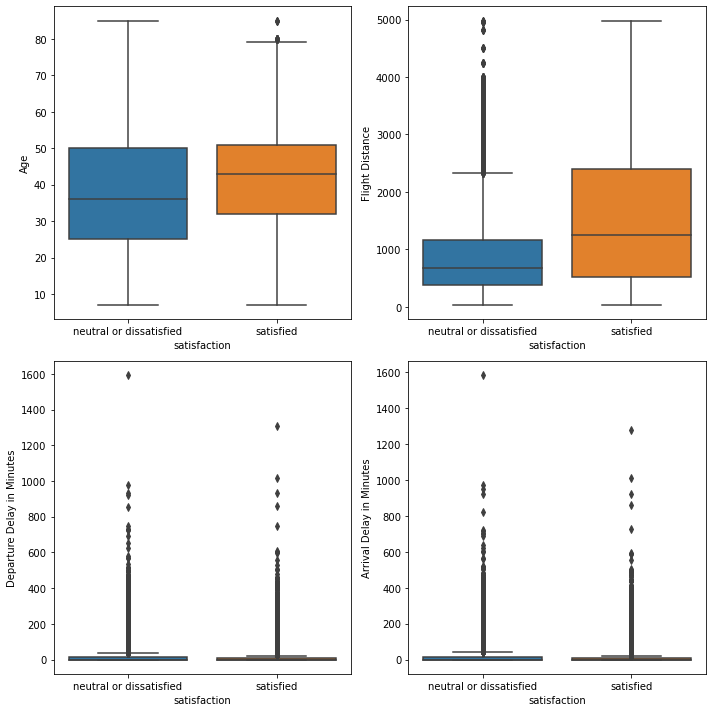

In [17]:
t=1
plt.figure(figsize=[10,10])
for i in num_col:
    plt.subplot(2,2,t)
    sns.boxplot(data.satisfaction,data[i])
    t=t+1
plt.tight_layout()
plt.show()

### Bivariate analysis - categorical columns

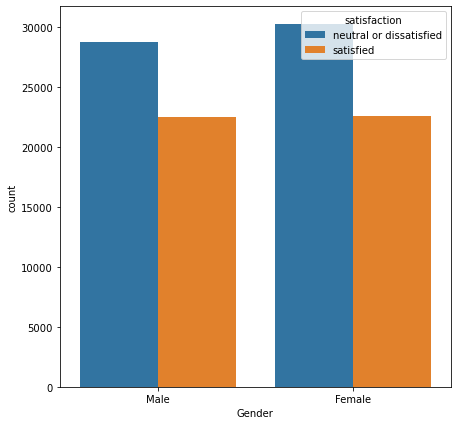

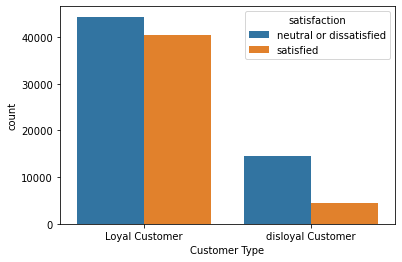

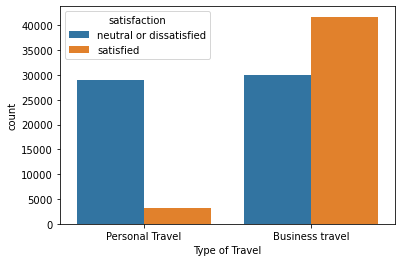

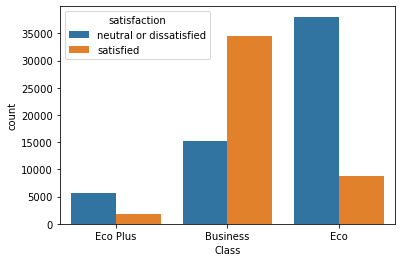

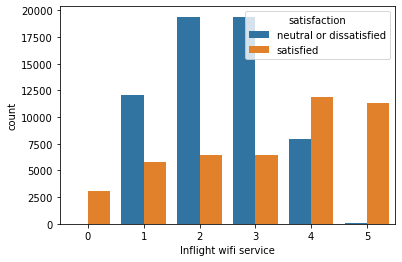

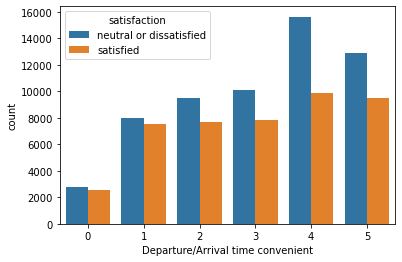

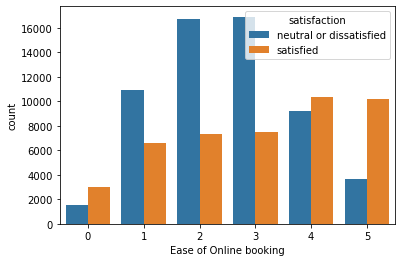

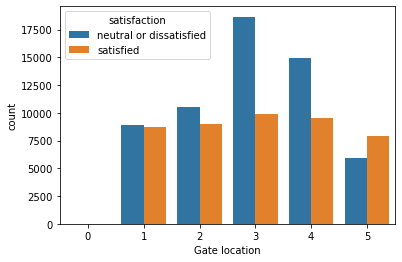

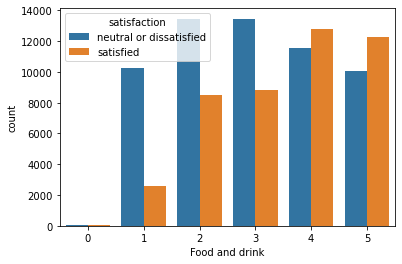

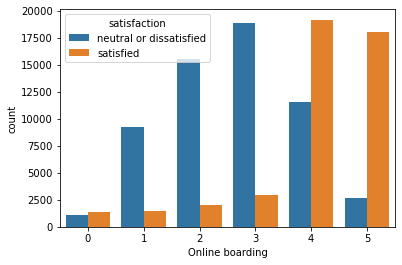

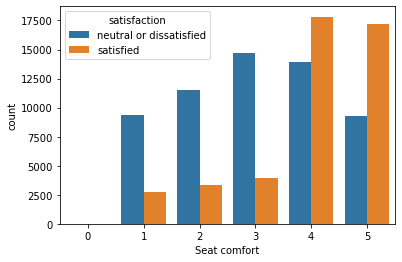

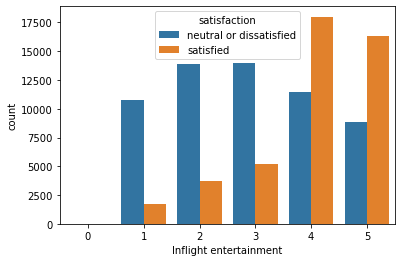

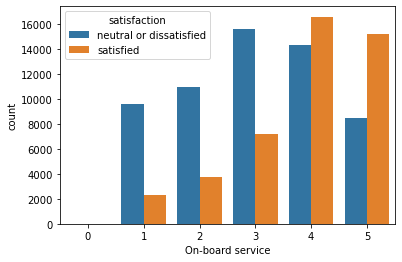

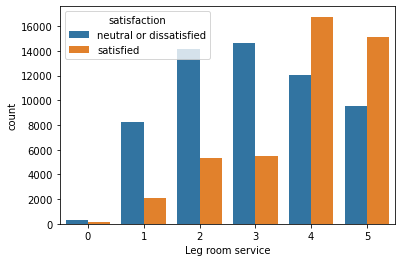

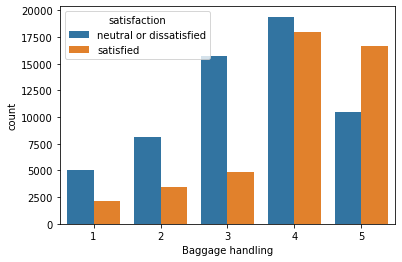

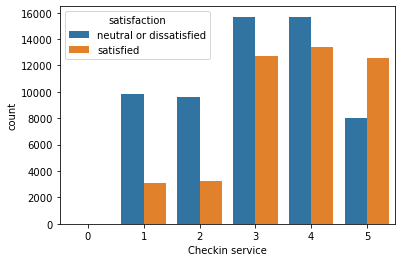

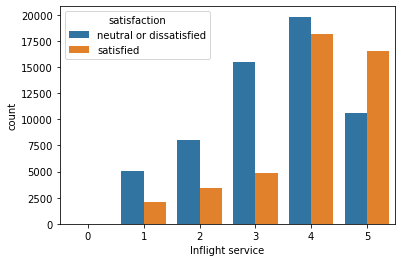

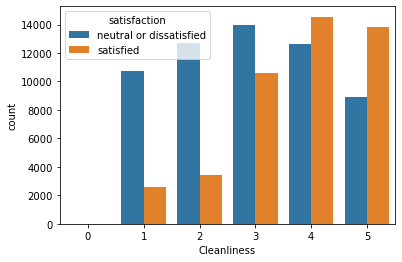

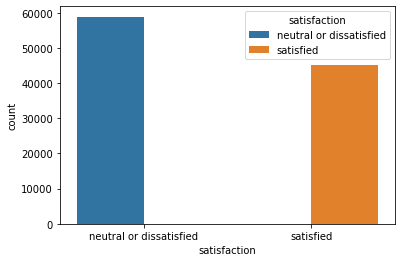

<Figure size 432x288 with 0 Axes>

In [18]:
t=1
plt.figure(figsize=[7,7])
for i in cat_col:
    #plt.subplot(20,1,t)
    sns.countplot(data[i],hue=data.satisfaction)
    plt.show()
    t=t+1
plt.tight_layout()


### Missing value

In [19]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [20]:
data.dropna(inplace=True)

In [21]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Encoding

In [22]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [23]:
l=['Gender','Customer Type','Type of Travel','Class']

In [24]:
data=pd.get_dummies(data,columns=l,drop_first=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103594 non-null  int64  
 1   Flight Distance                    103594 non-null  int64  
 2   Inflight wifi service              103594 non-null  object 
 3   Departure/Arrival time convenient  103594 non-null  object 
 4   Ease of Online booking             103594 non-null  object 
 5   Gate location                      103594 non-null  object 
 6   Food and drink                     103594 non-null  object 
 7   Online boarding                    103594 non-null  object 
 8   Seat comfort                       103594 non-null  object 
 9   Inflight entertainment             103594 non-null  object 
 10  On-board service                   103594 non-null  object 
 11  Leg room service                   1035

In [26]:
cat_columns=data.select_dtypes(include=np.object).columns
cat_columns

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [27]:
cat_columns=['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']
for i in cat_columns:
    data.loc[:,i]=data.loc[:,i].astype(int)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103594 non-null  int64  
 1   Flight Distance                    103594 non-null  int64  
 2   Inflight wifi service              103594 non-null  int32  
 3   Departure/Arrival time convenient  103594 non-null  int32  
 4   Ease of Online booking             103594 non-null  int32  
 5   Gate location                      103594 non-null  int32  
 6   Food and drink                     103594 non-null  int32  
 7   Online boarding                    103594 non-null  int32  
 8   Seat comfort                       103594 non-null  int32  
 9   Inflight entertainment             103594 non-null  int32  
 10  On-board service                   103594 non-null  int32  
 11  Leg room service                   1035

In [29]:
data.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

#### converting problem into classification

In [30]:

l=[0 if i=='neutral or dissatisfied' else 1 for i in data.satisfaction ]

In [31]:
data['satisfaction']=l

In [32]:
data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,1,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,1,0,0,0,0


## Spliting the data for Machine larning models

In [33]:
X=data.drop('satisfaction',axis=1)
y=data.satisfaction

In [34]:
X=sma.add_constant(X)

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(72515, 24) (31079, 24) (72515,) (31079,)


### 1) Logistic regression

In [37]:
model=sma.Logit(ytrain,xtrain).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.335172
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                72515
Model:                          Logit   Df Residuals:                    72491
Method:                           MLE   Df Model:                           23
Date:                Mon, 19 Dec 2022   Pseudo R-squ.:                  0.5101
Time:                        15:46:41   Log-Likelihood:                -24305.
converged:                       True   LL-Null:                       -49611.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -5.7382      0.089    -64.258      0.000      -5.913      -5.563
Age                                  -0.0087      0.001    -10.233      0.000      -0.010      -0.007
Flight Distance                   -5.059e-06   1.35e-05     -0.375      0.708   -3.15e-05    2.14e-05
Inflight wifi service                 0.3960      0.014     28.933      0.000       0.369       0.423
Departure/Arrival time convenient    -0.1124      0.010    -11.407      0.000      -0.132      -0.093
Ease of Online booking               -0.1674      0.014    -12.353      0.000      -0.194      -0.141
Gate location                         0.0291      0.011      2.648      0.008       0.008       0.051
Food and drink                       -0.0280      0.013     -2.205      0.027      -0.053      -0.003
Online boarding                       0.6115      0.012     50.065      0.000       0.588       0.635
Seat comfort                          0.0554      0.013      4.166      0.000       0.029       0.082
Inflight entertainment                0.0800      0.017      4.708      0.000       0.047       0.113
On-board service                      0.2861      0.012     23.528      0.000       0.262       0.310
Leg room service                      0.2483      0.010     24.404      0.000       0.228       0.268
Baggage handling                      0.1344      0.014      9.849      0.000       0.108       0.161
Checkin service                       0.3267      0.010     31.866      0.000       0.307       0.347
Inflight service                      0.1246      0.014      8.644      0.000       0.096       0.153
Cleanliness                           0.2119      0.014     14.663      0.000       0.184       0.240
Departure Delay in Minutes            0.0051      0.001      4.351      0.000       0.003       0.007
Arrival Delay in Minutes             -0.0096      0.001     -8.356      0.000      -0.012      -0.007
Gender_Male                           0.0520      0.023      2.233      0.026       0.006       0.098
Customer Type_disloyal Customer      -2.0424      0.036    -57.146      0.000      -2.112      -1.972
Type of Travel_Personal Travel       -2.7202      0.038    -72.432      0.000      -2.794      -2.647
Class_Eco                            -0.7361      0.031    -24.060      0.000      -0.796      -0.676
Class_Eco Plus                       -0.8727      0.050    -17.568      0.000      -0.970      -0.775
=====================================================================================================
"""

In [38]:
def score(acu,pred):
    print('confusion_matrix \n',confusion_matrix(acu,pred))
    print('accuracy_score ',accuracy_score(acu,pred))
    print('recall_score ',recall_score(acu,pred))
    print('cohen kappa score',cohen_kappa_score(acu,pred))
    print('classification_report \n',classification_report(acu,pred))

In [39]:
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

In [40]:
pred_prob=model.predict(xtest)
pred=[1 if x>0.5 else 0 for x in pred_prob]

In [41]:
score(ytest,pred)

confusion_matrix 
 [[15946  1635]
 [ 2247 11251]]
accuracy_score  0.875092506193893
recall_score  0.8335308934656986
cohen kappa score 0.74445221604401
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     17581
           1       0.87      0.83      0.85     13498

    accuracy                           0.88     31079
   macro avg       0.87      0.87      0.87     31079
weighted avg       0.88      0.88      0.87     31079



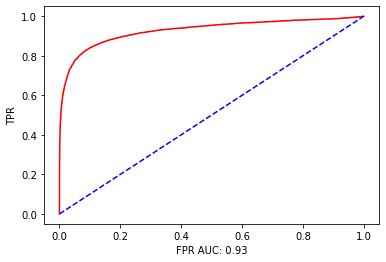

In [42]:
roc(ytest,pred_prob)

In [43]:
fpr,tpr,thres = roc_curve(ytest,pred_prob)
data_thres = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thres':thres,'Youden Index':(tpr-fpr)})
data_thres.sort_values(by='Youden Index',ascending=False)

,FPR,TPR,Thres,Youden Index
2052,0.086969,0.827826,0.516977,0.740857
2054,0.087083,0.827900,0.516763,0.740818
2048,0.086798,0.827604,0.517459,0.740806
2100,0.090211,0.831012,0.508455,0.740801
2058,0.087253,0.828049,0.516396,0.740795
...,...,...,...,...
5833,0.999374,0.999704,0.000756,0.000329
5837,0.999545,0.999852,0.000526,0.000307
1,0.000000,0.000074,0.995079,0.000074
0,0.000000,0.000000,1.995079,0.000000


In [44]:
pred=[1 if x>0.516977 else 0 for x in pred_prob]
score(ytest,pred)

confusion_matrix 
 [[16052  1529]
 [ 2324 11174]]
accuracy_score  0.8760256121496831
recall_score  0.8278263446436509
cohen kappa score 0.7459592009296141
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     17581
           1       0.88      0.83      0.85     13498

    accuracy                           0.88     31079
   macro avg       0.88      0.87      0.87     31079
weighted avg       0.88      0.88      0.88     31079



### 2) K nearest neighbour

In [49]:
model_k=KNeighborsClassifier()
model_k.fit(xtrain,ytrain)
pred_k=model_k.predict(xtest)
score(ytest,pred_k)

#by presence of outliers , knn performance gets degrade

confusion_matrix 
 [[14045  3536]
 [ 4538  8960]]
accuracy_score  0.7402104314810644
recall_score  0.66380204474737
cohen kappa score 0.4666987428588091
classification_report 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     17581
           1       0.72      0.66      0.69     13498

    accuracy                           0.74     31079
   macro avg       0.74      0.73      0.73     31079
weighted avg       0.74      0.74      0.74     31079



In [51]:
pred_prob_k=model_k.predict_proba(xtest)[:,1]

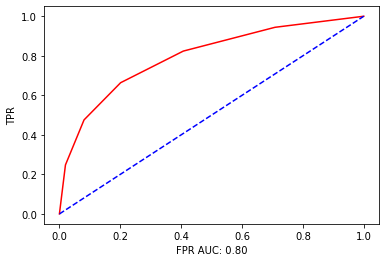

In [52]:
roc(ytest,pred_prob_k)

### 3) Naive Bayes 

In [53]:
model_nb=GaussianNB()
model_nb.fit(xtrain,ytrain)
pred_nb=model_nb.predict(xtest)
score(ytest,pred_nb)

confusion_matrix 
 [[15840  1741]
 [ 2574 10924]]
accuracy_score  0.8611602689919238
recall_score  0.8093050822344051
cohen kappa score 0.7154043649456321
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     17581
           1       0.86      0.81      0.84     13498

    accuracy                           0.86     31079
   macro avg       0.86      0.86      0.86     31079
weighted avg       0.86      0.86      0.86     31079



### 4) Decision Tree

In [55]:
model_k=DecisionTreeClassifier(criterion='entropy')
model_k.fit(xtrain,ytrain)
pred_k=model_k.predict(xtest)
score(ytest,pred_k)

confusion_matrix 
 [[16731   850]
 [  841 12657]]
accuracy_score  0.9455902699572059
recall_score  0.9376944732552971
cohen kappa score 0.8892779732465976
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     17581
           1       0.94      0.94      0.94     13498

    accuracy                           0.95     31079
   macro avg       0.94      0.94      0.94     31079
weighted avg       0.95      0.95      0.95     31079



### 5) Random forest 

In [57]:
model_k=RandomForestClassifier(criterion='entropy')
model_k.fit(xtrain,ytrain)
pred_k=model_k.predict(xtest)
score(ytest,pred_k)

confusion_matrix 
 [[17220   361]
 [  859 12639]]
accuracy_score  0.9607451977219345
recall_score  0.9363609423618314
cohen kappa score 0.9197678448852309
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     17581
           1       0.97      0.94      0.95     13498

    accuracy                           0.96     31079
   macro avg       0.96      0.96      0.96     31079
weighted avg       0.96      0.96      0.96     31079



In [ ]:
#